In [1]:
import numpy as np
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp



In [2]:
h_bar = 197.3 #c^2 MeV fm
m_p = 4 * 931.494 # MeV c^2
q_e = 1.44 
e_p = 2 #eV
Polonium_212 = [208, -40, 84] 
N = 2000
r = np.linspace(0.0, 27, N, endpoint=False) #fm

In [3]:
def potential(atom_profile, x) :
    R_0 = 1.2 * ((atom_profile[0] - 4)**(1/3) + 4**(1/3))
    if x < R_0 :
        #print(atom_profile[1])
        return atom_profile[1]
    else :
        #print(((2 * (atom_profile[2] - 2))/ (x)) * q_e)
        return  ((2 * (atom_profile[2] - 2))/ (x)) * q_e


In [4]:
def calculate_potential(atom_profile, r) :
    v_diag = np.zeros(N)
    for i in range(len(r)) :
        v_diag[i] = potential(atom_profile, r[i])
    potential_term = sparse.diags((v_diag))
    print(potential_term)
    return potential_term

In [5]:
def calculate_laplace(r):
    d = r[1] - r[0]
    main_diag = -2.0 / d**2 * np.ones(N)     
    off_diag  =  1.0 / d**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     

In [6]:
def build_hamiltonian(r):
    laplace_term =   calculate_laplace(r)
    #angular_term =   calculate_angular_term(r)
    potential_term = calculate_potential(Polonium_212, r)
     
    hamiltonian = ((-h_bar**2 / (2.0 * m_p)) * (laplace_term)) - potential_term
 
    return hamiltonian

In [7]:
def plot(r, densities, eigenvalues):
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
    #plt.plot(r * 1e+10, potential_graph(Z,r), color='black',  label='potential')
    energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real /((e_p))) for i in range(3)]
    plt.plot(r * 1e+10, (densities[0]) , color='blue',  label=energies[0])
    plt.plot(r * 1e+10, (densities[1]), color='green', label=energies[1])
    plt.plot(r * 1e+10, (densities[2]), color='red',   label=energies[2])
    #plt.plot(r * 1e+10, (densities[0]) , color='blue')
    #plt.plot(r * 1e+10, (densities[1]), color='green')
    #plt.plot(r * 1e+10, (densities[2]), color='red')
    plt.legend()
    plt.show()
    return

In [8]:
def shooting_method(Hamiltonian, guess_energy):
    def schrodinger_equation(x, psi, H, E):
        return np.dot(H, psi) - E * psi

    def boundary_condition(ya, yb):
        return ya[0] - 1, yb[0]

    # Initial wave function guess
    psi0 = np.array([1, 0])

    # Integration range
    x_span = [r[0], r[-1]]

    # Solve the boundary value problem
    result = solve_ivp(lambda x, psi: schrodinger_equation(x, psi, Hamiltonian, guess_energy),
                       x_span, psi0, method='RK45', events=boundary_condition)

    return result.y[:, -1][0]


def find_eigenvalues(Hamiltonian, num_eigenvalues):
    eigenvalues = []
    guess_energy = 0.0
    while len(eigenvalues) < num_eigenvalues:
        guess_energy += 0.1  # Incremental energy guess
        wave_function_value = shooting_method(Hamiltonian, guess_energy)
        if wave_function_value * shooting_method(Hamiltonian, guess_energy + 0.1) < 0:
            eigenvalues.append(guess_energy)

    return eigenvalues

In [10]:
hamiltonian = build_hamiltonian(r)
shooting_method(hamiltonian, 5)

densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

plot(r, densities, eigenvalues) 
 

  (0, 0)	-40.0
  (1, 1)	-40.0
  (2, 2)	-40.0
  (3, 3)	-40.0
  (4, 4)	-40.0
  (5, 5)	-40.0
  (6, 6)	-40.0
  (7, 7)	-40.0
  (8, 8)	-40.0
  (9, 9)	-40.0
  (10, 10)	-40.0
  (11, 11)	-40.0
  (12, 12)	-40.0
  (13, 13)	-40.0
  (14, 14)	-40.0
  (15, 15)	-40.0
  (16, 16)	-40.0
  (17, 17)	-40.0
  (18, 18)	-40.0
  (19, 19)	-40.0
  (20, 20)	-40.0
  (21, 21)	-40.0
  (22, 22)	-40.0
  (23, 23)	-40.0
  (24, 24)	-40.0
  :	:
  (1975, 1975)	8.857383966244726
  (1976, 1976)	8.852901484480432
  (1977, 1977)	8.848423537346147
  (1978, 1978)	8.843950117964274
  (1979, 1979)	8.839481219471114
  (1980, 1980)	8.835016835016834
  (1981, 1981)	8.830556957765438
  (1982, 1982)	8.826101580894719
  (1983, 1983)	8.821650697596235
  (1984, 1984)	8.817204301075268
  (1985, 1985)	8.812762384550798
  (1986, 1986)	8.808324941255455
  (1987, 1987)	8.803891964435497
  (1988, 1988)	8.799463447350771
  (1989, 1989)	8.795039383274679
  (1990, 1990)	8.790619765494137
  (1991, 1991)	8.786204587309559
  (1992, 1992)	8.78179384203

NotImplementedError: subtracting a nonzero scalar from a sparse array is not supported

  (0, 0)	-40.0
  (1, 1)	-40.0
  (2, 2)	-40.0
  (3, 3)	-40.0
  (4, 4)	-40.0
  (5, 5)	-40.0
  (6, 6)	-40.0
  (7, 7)	-40.0
  (8, 8)	-40.0
  (9, 9)	-40.0
  (10, 10)	-40.0
  (11, 11)	-40.0
  (12, 12)	-40.0
  (13, 13)	-40.0
  (14, 14)	-40.0
  (15, 15)	-40.0
  (16, 16)	-40.0
  (17, 17)	-40.0
  (18, 18)	-40.0
  (19, 19)	-40.0
  (20, 20)	-40.0
  (21, 21)	-40.0
  (22, 22)	-40.0
  (23, 23)	-40.0
  (24, 24)	-40.0
  :	:
  (1975, 1975)	8.857383966244726
  (1976, 1976)	8.852901484480432
  (1977, 1977)	8.848423537346147
  (1978, 1978)	8.843950117964274
  (1979, 1979)	8.839481219471114
  (1980, 1980)	8.835016835016834
  (1981, 1981)	8.830556957765438
  (1982, 1982)	8.826101580894719
  (1983, 1983)	8.821650697596235
  (1984, 1984)	8.817204301075268
  (1985, 1985)	8.812762384550798
  (1986, 1986)	8.808324941255455
  (1987, 1987)	8.803891964435497
  (1988, 1988)	8.799463447350771
  (1989, 1989)	8.795039383274679
  (1990, 1990)	8.790619765494137
  (1991, 1991)	8.786204587309559
  (1992, 1992)	8.78179384203

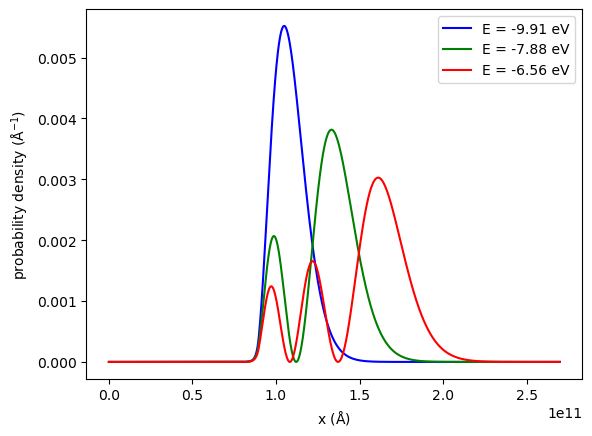

In [ ]:
hamiltonian = build_hamiltonian(r)
 
""" solve eigenproblem """
#E, psi_E=eigh(hamiltonian)
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)

""" compute probability density for each eigenvector """
densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

plot(r, densities, eigenvalues) 

In [ ]:
hamiltonian = build_hamiltonian(r)
num_eigenvalues = 5  # specify the number of eigenvalues to find
eigenvalues = find_eigenvalues(hamiltonian, num_eigenvalues)
""" compute probability density for each eigenvector """
densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

plot(r, densities, eigenvalues) 

  (0, 0)	-40.0
  (1, 1)	-40.0
  (2, 2)	-40.0
  (3, 3)	-40.0
  (4, 4)	-40.0
  (5, 5)	-40.0
  (6, 6)	-40.0
  (7, 7)	-40.0
  (8, 8)	-40.0
  (9, 9)	-40.0
  (10, 10)	-40.0
  (11, 11)	-40.0
  (12, 12)	-40.0
  (13, 13)	-40.0
  (14, 14)	-40.0
  (15, 15)	-40.0
  (16, 16)	-40.0
  (17, 17)	-40.0
  (18, 18)	-40.0
  (19, 19)	-40.0
  (20, 20)	-40.0
  (21, 21)	-40.0
  (22, 22)	-40.0
  (23, 23)	-40.0
  (24, 24)	-40.0
  :	:
  (1975, 1975)	8.857383966244726
  (1976, 1976)	8.852901484480432
  (1977, 1977)	8.848423537346147
  (1978, 1978)	8.843950117964274
  (1979, 1979)	8.839481219471114
  (1980, 1980)	8.835016835016834
  (1981, 1981)	8.830556957765438
  (1982, 1982)	8.826101580894719
  (1983, 1983)	8.821650697596235
  (1984, 1984)	8.817204301075268
  (1985, 1985)	8.812762384550798
  (1986, 1986)	8.808324941255455
  (1987, 1987)	8.803891964435497
  (1988, 1988)	8.799463447350771
  (1989, 1989)	8.795039383274679
  (1990, 1990)	8.790619765494137
  (1991, 1991)	8.786204587309559
  (1992, 1992)	8.78179384203

NotImplementedError: subtracting a nonzero scalar from a sparse array is not supported

In [ ]:
hamiltonian = build_hamiltonian(r)
 
""" solve eigenproblem """
#E, psi_E=eigh(hamiltonian)
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)

""" compute probability density for each eigenvector """
densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

plot(r, densities, eigenvalues) 

In [ ]:
#hamiltonian = build_hamiltonian(r)
#def find_energy_eigen(matrix):
    #eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    #return eigenvalues, eigenvectors

# Find energy eigenvalues and eigenvectors
#energy_eigenvalues, energy_eigenvectors = find_energy_eigen(build_hamiltonian(r))


In [ ]:
""" compute probability density for each eigenvector """
#densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

#plot(r, densities, eigenvalues) 

' plot results '

In [ ]:
#calculate_potential(Polonium_212, r)
#calculate_laplace(r)
#build_hamiltonian(r)